<a href="https://colab.research.google.com/github/tripathiosho/ImportantNotebooks/blob/main/KNN_Business_Case-class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 32.7MB/s]


In [2]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [3]:
df['class'].value_counts()

,count
class,
2,180
3,173
1,87


In [4]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen'    ]].copy()
y=df[['class']].copy()


In [5]:
X.shape

(440, 7)

In [6]:
y.shape

(440, 1)

In [7]:
# for this data i would need visualization power of 8 D

#find a way to make it visible in 2D

# JUST FOR VISIALIZATION PURPOSE PCA

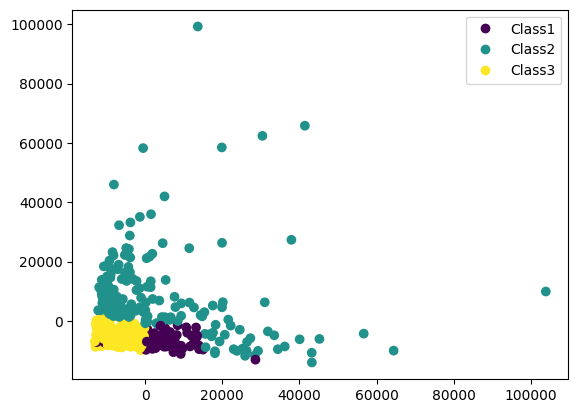

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [10]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()

,count
class,
1,99
2,99
3,99


In [11]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [12]:
#KNN implementation from scratch

X_val_scaled[50]

array([ 0.69902556, -0.6016522 , -0.44540114, -0.64434357, -0.31533449,
       -0.50293756, -0.28026509])

In [13]:
dist = np.sqrt(np.sum((X_sm - X_val_scaled[50])**2, axis=1))

In [14]:
dist.shape

(297,)

In [15]:
#I WANT THE LABELS WITH THE DISTANCE THAT WE HAVE CALCULATED


y_sm

array([2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1, 3, 2, 1,
       2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2,
       1, 2, 1, 3, 3, 1, 3, 3, 2, 2, 2, 3, 1, 3, 2, 1, 1, 1, 2, 1, 3, 2,
       3, 3, 2, 3, 1, 3, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2,
       3, 3, 2, 3, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3,
       2, 3, 1, 3, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 1, 2, 1, 1,
       1, 3, 1, 1, 2, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       2, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 3, 1,
       1, 3, 3, 2, 3, 3, 1, 2, 3, 1, 3, 1, 3, 2, 2, 2, 3, 1, 3, 1, 1, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 3, 2, 1, 3, 1, 2, 3, 2, 2,
       3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [16]:
dist

array([ 2.82402588,  1.16890135,  3.9289681 ,  1.24220361,  0.70802512,
        2.88959554,  0.72575883,  0.51921772,  2.14206475,  0.52895508,
        2.48501235,  2.98674812,  7.08905791,  0.50640657,  1.45188537,
        1.4185505 ,  1.65670663,  4.08503431,  0.86049854,  2.59992184,
       12.5988401 ,  0.93968946,  1.58774392,  0.30272815,  2.48912863,
        1.28429819,  1.47832955,  2.50517884,  2.06382368,  0.92181424,
        2.91263729,  2.91679471,  8.05665498,  0.3033342 ,  0.41945366,
        0.99284905,  0.7021093 ,  1.38467904,  2.06497756,  2.63470153,
        0.56618813,  1.43629775,  5.19818969,  2.53067118,  0.89734933,
        1.73200664,  2.13959813,  0.61609357,  1.07944143,  1.09319304,
        0.39715087,  1.84165902,  4.44105344,  5.15650656,  1.80236595,
        2.66326672,  1.50924573,  0.32907506,  1.82207294,  2.41970825,
        2.02539052,  1.97556706,  3.04075043,  1.21692506,  1.35160667,
        1.45285404,  2.64394483,  2.61758278,  5.31593752,  0.56

In [17]:
distances= [(dist[i], y_sm[i]) for i in range (len(dist))]

In [18]:
distances

[(np.float64(2.8240258792403057), np.int64(2)),
 (np.float64(1.1689013469322738), np.int64(1)),
 (np.float64(3.928968096992009), np.int64(2)),
 (np.float64(1.2422036125795766), np.int64(3)),
 (np.float64(0.7080251189180004), np.int64(3)),
 (np.float64(2.889595541194924), np.int64(2)),
 (np.float64(0.7257588269003848), np.int64(3)),
 (np.float64(0.5192177206236951), np.int64(3)),
 (np.float64(2.1420647533562582), np.int64(2)),
 (np.float64(0.528955082501895), np.int64(3)),
 (np.float64(2.4850123514662843), np.int64(3)),
 (np.float64(2.9867481165524605), np.int64(2)),
 (np.float64(7.089057911716046), np.int64(2)),
 (np.float64(0.5064065738501792), np.int64(3)),
 (np.float64(1.451885370288032), np.int64(1)),
 (np.float64(1.4185504972094298), np.int64(1)),
 (np.float64(1.6567066342404975), np.int64(1)),
 (np.float64(4.085034305917013), np.int64(2)),
 (np.float64(0.8604985424887213), np.int64(1)),
 (np.float64(2.5999218376635445), np.int64(3)),
 (np.float64(12.598840096110482), np.int64(2))

In [19]:
# sort the distances 2 and 3

distances= sorted(distances)

In [20]:
distances

[(np.float64(0.20324760940897763), np.int64(3)),
 (np.float64(0.215367322069866), np.int64(3)),
 (np.float64(0.23138739909829448), np.int64(3)),
 (np.float64(0.2856625012016845), np.int64(3)),
 (np.float64(0.30272815358339106), np.int64(3)),
 (np.float64(0.3033342001359094), np.int64(3)),
 (np.float64(0.32907505901467426), np.int64(3)),
 (np.float64(0.33515152370200896), np.int64(3)),
 (np.float64(0.34408955943055436), np.int64(3)),
 (np.float64(0.3664595091625519), np.int64(3)),
 (np.float64(0.3688443941253128), np.int64(3)),
 (np.float64(0.37726664509389835), np.int64(3)),
 (np.float64(0.38506010895129045), np.int64(3)),
 (np.float64(0.39715086764623453), np.int64(3)),
 (np.float64(0.41267478526901685), np.int64(3)),
 (np.float64(0.4144056761048786), np.int64(1)),
 (np.float64(0.4194536628968587), np.int64(3)),
 (np.float64(0.4436689977650167), np.int64(3)),
 (np.float64(0.4530598039457964), np.int64(3)),
 (np.float64(0.49009906015801713), np.int64(3)),
 (np.float64(0.497488573871185

In [21]:
#define k
k=5
dister = distances[:k]

In [22]:
dister

[(np.float64(0.20324760940897763), np.int64(3)),
 (np.float64(0.215367322069866), np.int64(3)),
 (np.float64(0.23138739909829448), np.int64(3)),
 (np.float64(0.2856625012016845), np.int64(3)),
 (np.float64(0.30272815358339106), np.int64(3))]

In [23]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [24]:
knn(X_sm,y_sm,X_val_scaled[1],10)

(2,
 array([[0.4327003 , 2.        ],
        [0.66254573, 2.        ],
        [0.86821955, 2.        ],
        [0.97631013, 2.        ],
        [1.00731314, 2.        ],
        [1.13713287, 2.        ],
        [1.17259338, 2.        ],
        [1.30394999, 2.        ],
        [1.35957159, 2.        ],
        [1.37590697, 2.        ]]))

In [25]:
y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           1       0.90      0.67      0.77        27
           2       0.77      0.95      0.85        38
           3       0.95      0.91      0.93        45

    accuracy                           0.86       110
   macro avg       0.87      0.84      0.85       110
weighted avg       0.88      0.86      0.86       110



In [27]:
#sklearn implementation

from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn= KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [29]:
knn.fit(X_sm, y_sm)

KNeighborsClassifier(metric='euclidean')

In [30]:
y_pred= knn.predict(X_test_scaled)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.90      0.67      0.77        27
           2       0.77      0.95      0.85        38
           3       0.95      0.91      0.93        45

    accuracy                           0.86       110
   macro avg       0.87      0.84      0.85       110
weighted avg       0.88      0.86      0.86       110



In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
cm = confusion_matrix(y_test, y_pred)

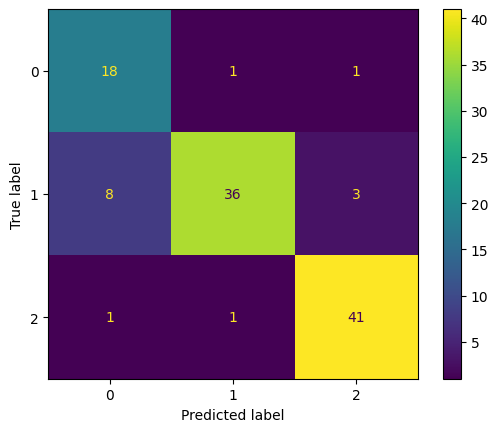

In [34]:
ConfusionMatrixDisplay(cm).plot()


In [35]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val_scaled,y_val))

Text(0, 0.5, 'Accuracy')

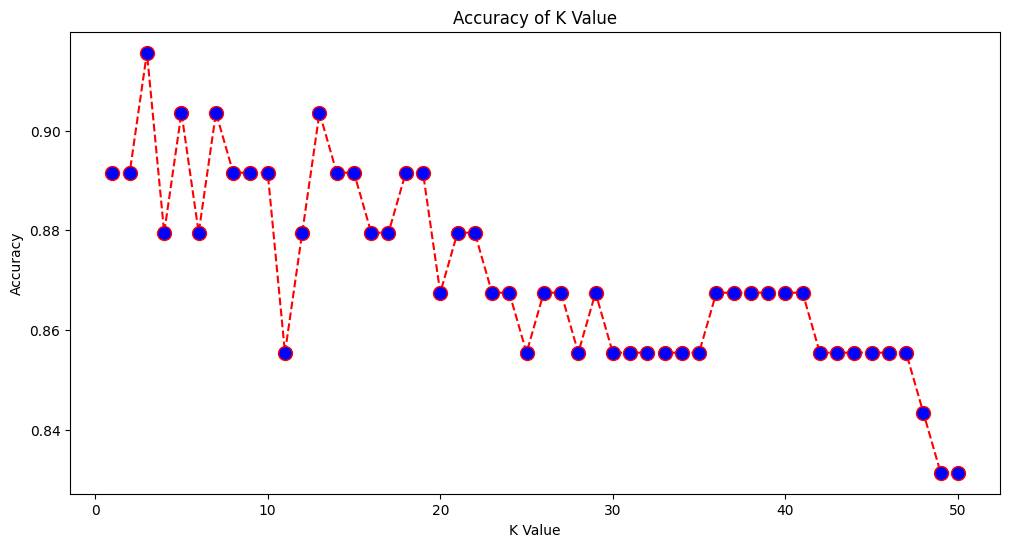

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

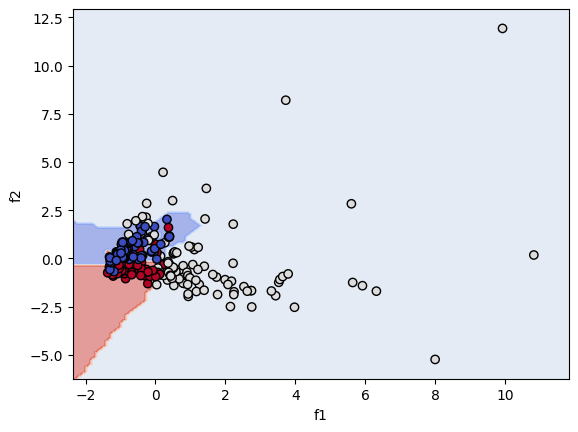

In [37]:
#MORE VISALIZATION

import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot


pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

# Creating and fitting the tree classifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

In [38]:

df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [39]:
df.isnull().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [41]:
#Imputation for completing missing values using k-Nearest Neighbors.

#Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [42]:
from sklearn.impute import KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors=3)

In [44]:
imputed_data= imputer.fit_transform(X_sm)